# info

**Notes from project pdf**

predictive analysis using the Bank Marketing dataset. 
goal is to predict whether a client will subscribe to a term deposit. 
The problem revolves around the direct marketing campaigns conducted by a Portuguese banking institution

Notably, multiple interactions with the same client were often necessary to determine whether the client would subscribe to the bank's term deposit product ('yes') or decline it ('no’).

**you will use Bank Marketing data to predict whether a client will subscribe a term deposit**
use training data for training data , test data strictly for testing
-might want to split training data into training and validation

we explore a **minimum of three diverse machine learning algorithms for classification. We're not just limited to the algorithms covered in our classes; feel free to explore new techniques** that could potentially provide valuable insights and better performance

Oversampling Strategy: Should the need arise to perform oversampling to address class imbalance, please be mindful to carry out this process solely on the training dataset.

Feature Engineering: We encourage you to unleash your creativity when it comes to
feature engineering. This includes the potential for feature generation and feature
selection. Specifically, feature generation involves creating new features from the
existing data to enhance the representation of the underlying patterns in the dataset.
Feature selection is the process of identifying and retaining the most relevant features
from the original set of features

External data: You can leverage external data if you believe they are useful.

**our project is centered around making accurate predictions about term
deposit subscriptions using the Bank Marketing dataset. By leveraging a variety of
machine learning algorithms, responsibly handling oversampling, and applying feature
engineering techniques**

**performance evaluation**
n the spirit of thorough evaluation, we will report a range of key performance metrics
to comprehensively assess the models we'll be building. Specifically, we'll focus on
**precision, recall, and F-measure** for the 'yes' class. Moreover, we'll calculate the
**macro-average F-measure and micro-average F-measure, Accuracy, MCC** to capture
overall model performance across classes. N

**readme.txt file** 

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45,211 for bank-full.csv, including 36,169 training data and 9,042 test data

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
   ** bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   
   ** related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
  
   ** other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


# eda

In [3]:
import os

train_path="/Users/haidiazaman/Desktop/nus-dsa5101/Project/trainingdata.txt"
test_path="/Users/haidiazaman/Desktop/nus-dsa5101/Project/testdata.txt"
assert os.path.exists(train_path)
assert os.path.exists(test_path)

with open(train_path) as f:
    train_data=f.readlines()
    
len(train_data)#,train_data
#; separates columns 
#, separates rows

36169

In [22]:
import pandas as pd
train_df = pd.read_csv(train_path,sep=";")
print(len(train_df))
train_df.head()
#    9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
#   10 - day: last contact day of the month (numeric)
#   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
#   12 - duration: last contact duration, in seconds (numeric)
  
#    ** other attributes:
#   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#   15 - previous: number of contacts performed before this campaign and for this client (numeric)
#   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#   Output variable (desired target):
#   17 - y - has the client subscribed a term deposit? (binary: "yes","no") (LABEL)

36168


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,yes


In [37]:
# print number of Y and N
num_y = len(train_df[train_df["y"]=="yes"])
num_n = len(train_df)-num_y
print(num_y,num_n,num_y+num_n==len(train_df)) #verify no unlabelled data
print(f"percentage of training data that is Yes Label is only: {num_y/(len(train_data))} %")
# there is unbalanced data - need to deal with this, will need to use some oversampling techniques on the Yes labels

4231 31937 True
percentage of training data that is Yes Label is only: 0.11697862810694241 %


# project

**to do**
1. data preprocessing 
 (https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-1-missing-data-45e76b781993)
 - identify and handle missing values
 - need to change the categorical variables (multi and binary to one hot)
 - normalise the numerical data
2. data imbalance 
 - need to deal with this, will need to use some oversampling techniques on the Yes labels
 - the yes data is only 10% of the entire dataset, 90 % no
 - Try: Synthetic Minority Over-sampling Technique (SMOTE) or Adaptive Synthetic Sampling (ADASYN). 
3. feature engineering
 - just try using all avail features to setup a baseline model for reference
 - then do feature selection, choose the most relevant features, use r value, Pearson correlation coefficient
 (https://www.youtube.com/watch?v=FndwYNcVe0U&t=1s)
 - then can try feature generation: advanced feature engineering techniques (e.g. autoencoders)
4. fit min 3 diff models, lets aim for 5
 - a. Logistic Regression (used when the dependent variable is binary or categorical. It models the probability of a binary outcome. dependent variable is transformed using the logistic function (sigmoid function) to ensure that the predicted values are in the range [0, 1])
 - b. Random Forest (ensemble learning method that combines multiple decision trees to improve predictive performance)
 - c. XGBoost (another ensemble technique that builds a strong predictive model by sequentially adding weak learners)
 - d. Neural networks? try simple dense layers with sigmoid activation function (different from logistic regression, logistic regression is linear, the sigmoid is only applied at the end to get the probability score for the binary task but the NN has sigmoid activation functions that adds non linearity to the model after every layer)
 - train and finetune hyperparams accordingly
 - can explore using LRscheduler
5. performance criteria 
 - precision, recall, and F-measure, macro-average F-measure and micro-average F-measure, Accuracy, MCC for the 'yes' class
6. conclusion
 - Summarize findings, choose the best-performing model(s), and report the model's performance metrics, discuss implications for your project.


## data preprocessing

In [2]:
import pandas as pd

train_df = pd.read_csv(train_path,sep=";")
print(train_df.to_numpy().shape)
train_df.head() 

(36168, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,yes


In [3]:
test_df = pd.read_csv(test_path,sep=";")
print(test_df.to_numpy().shape)
test_df.head()

(9043, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,48,housemaid,married,tertiary,no,468,yes,no,unknown,14,may,220,1,-1,0,unknown,no
1,31,management,single,tertiary,no,10215,no,no,cellular,22,aug,139,2,-1,0,unknown,no
2,45,blue-collar,married,primary,no,900,yes,no,unknown,9,jun,213,1,-1,0,unknown,no
3,58,blue-collar,married,primary,no,1231,no,no,unknown,20,jun,21,3,-1,0,unknown,no
4,35,technician,single,tertiary,no,5301,no,no,cellular,21,nov,937,2,-1,0,unknown,yes


In [4]:
# handle missing data

train_df.isna().any().any()
#False means theres no missing data at all - all good

#return true if there is even 1 missing value
#if use .all() will return True only when all the values in the pd Series are True

False

In [5]:
train_df.columns==test_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
# dataset info 

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.7+ MB


In [7]:
# dataset info 

train_df.describe() #only for numerical data

,age,balance,day,duration,campaign,pdays,previous
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.942076,1365.055989,15.778534,258.363166,2.769907,39.749889,0.579601
std,10.616610,3098.191637,8.313360,257.188052,3.119367,99.547099,2.384831
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1422.250000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
test=train_df["job"].unique()
len(test),test

(12,
 array(['technician', 'management', 'admin.', 'services', 'blue-collar',
        'unemployed', 'retired', 'self-employed', 'housemaid', 'unknown',
        'student', 'entrepreneur'], dtype=object))

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
encoder=encoder.fit(test)
transformed_data=encoder.transform(train_df["job"])
transformed_data

array([9, 4, 0, ..., 9, 1, 3])

In [10]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,yes


In [11]:
# # lets drop the exact day of the last contact as it might get too specific
# print(len(train_df.columns))
# train_df=train_df.drop(["day"],axis=1)
# print(len(train_df.columns))
# train_df.head()

17
16


,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,jul,10,23,-1,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,may,388,2,-1,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,jun,67,12,-1,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,jun,62,1,-1,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,apr,306,2,-1,0,unknown,yes


In [11]:
numerical_columns=["age","balance","duration","campaign","pdays","previous"]
categorical_columns=[x for x in train_df.columns if x not in numerical_columns]
print(len(numerical_columns),len(categorical_columns))
len(numerical_columns)+len(categorical_columns)==len(train_df.columns)

6 11


True

In [12]:
# create label encoders for all the categorical data in the df
from sklearn.preprocessing import LabelEncoder
all_encoders={}

for col in categorical_columns:
    if col=="month":
        continue
    print(col)
    encoder=LabelEncoder() #initialise a new label encoder
    unique_categories=sorted(train_df[col].unique()) #sort the unique categories to make the encoding neater
    encoder=encoder.fit(unique_categories)
    all_encoders[col]=encoder

job
marital
education
default
housing
loan
contact
day
poutcome
y


In [13]:
# create label encoder for the month category, actually not needed, but its neater like this
col="month"
unique_categories=train_df[col].unique()
print(unique_categories)
unique_categories=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
encoder=LabelEncoder()
encoder=encoder.fit(unique_categories)
all_encoders[col]=encoder

['jul' 'may' 'jun' 'apr' 'feb' 'jan' 'aug' 'nov' 'dec' 'mar' 'sep' 'oct']


In [14]:
len(all_encoders.keys()) #nice correct

11

In [15]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,yes


In [16]:
for col in categorical_columns:
    encoder=all_encoders[col]
    train_df[col]=encoder.transform(train_df[col])
    
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,9,0,1,0,-78,1,1,0,28,5,10,23,-1,0,3,0
1,50,4,1,2,0,106,1,0,2,14,8,388,2,-1,0,3,0
2,47,0,1,1,0,407,1,0,2,4,6,67,12,-1,0,3,0
3,39,0,0,1,0,952,1,0,2,15,6,62,1,-1,0,3,0
4,30,4,2,2,0,364,0,0,0,29,0,306,2,-1,0,3,1


In [17]:
all_encoders["job"].classes_,all_encoders["marital"].classes_,all_encoders["education"].classes_

(array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype='<U13'),
 array(['divorced', 'married', 'single'], dtype='<U8'),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype='<U9'))

In [18]:
len(train_df)

36168

# decision tree 

In [19]:
# example decision tree implementation 
from sklearn.datasets import load_iris
from sklearn import tree

iris=load_iris()
print(iris.data.shape,iris.target.shape)
clf = tree.DecisionTreeClassifier()         # We want to build a DT
clf = clf.fit(iris.data, iris.target)

(150, 4) (150,)


In [20]:
train_df.to_numpy().shape

(36168, 17)

In [21]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,9,0,1,0,-78,1,1,0,28,5,10,23,-1,0,3,0
1,50,4,1,2,0,106,1,0,2,14,8,388,2,-1,0,3,0
2,47,0,1,1,0,407,1,0,2,4,6,67,12,-1,0,3,0
3,39,0,0,1,0,952,1,0,2,15,6,62,1,-1,0,3,0
4,30,4,2,2,0,364,0,0,0,29,0,306,2,-1,0,3,1


In [22]:
# prepare features and labels (not done any feature selection or extraction)
# not handled class imbalance
# dont need to normalise numerical data since we just using decision tree where decisions are binary
import numpy as np

features=train_df.drop(["y"],axis=1)
print(features.columns)
features.head()
features=features.to_numpy()
labels=train_df["y"].to_numpy()
features.shape,labels.shape

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


((36168, 16), (36168,))

In [23]:
#fit the training data
from sklearn import tree

classifier=tree.DecisionTreeClassifier()
classifier=classifier.fit(features,labels)

In [ ]:
tree_output = tree.export_text(classifier)
# print(tree_output)

In [25]:
# preprocess test data

for col in categorical_columns:
    encoder=all_encoders[col]
    test_df[col]=encoder.transform(test_df[col])
    
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,48,3,1,2,0,468,1,0,2,13,8,220,1,-1,0,3,0
1,31,4,2,2,0,10215,0,0,0,21,1,139,2,-1,0,3,0
2,45,1,1,0,0,900,1,0,2,8,6,213,1,-1,0,3,0
3,58,1,1,0,0,1231,0,0,2,19,6,21,3,-1,0,3,0
4,35,9,2,2,0,5301,0,0,0,20,9,937,2,-1,0,3,1


In [26]:
print(test_df.to_numpy().shape)

(9043, 17)


In [27]:
test_features=test_df.drop(["y"],axis=1).to_numpy()
test_features.shape

(9043, 16)

In [28]:
# predict on test data
predictions=classifier.predict(test_features)
predictions

array([0, 0, 0, ..., 0, 0, 0])

## metrics
**precision, recall, and F-measure** for the 'yes' class. Moreover, we'll calculate the
**macro-average F-measure and micro-average F-measure, Accuracy, MCC**

In [35]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

conf_mat = confusion_matrix(test_df["y"].to_numpy(),predictions,labels=classifier.classes_)
conf_mat

array([[7401,  584],
       [ 560,  498]])

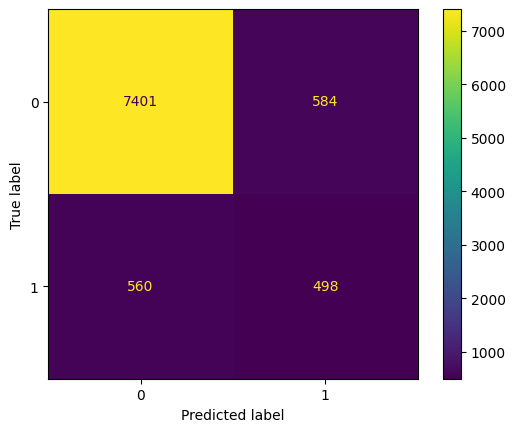

In [39]:
import matplotlib.pyplot as plt

display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
display.plot()
plt.show()
# top is actual true values, left is predicted values

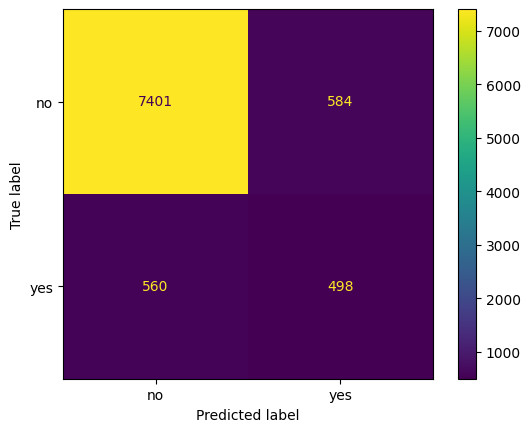

In [40]:
import matplotlib.pyplot as plt

display = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=["no","yes"])
display.plot()
plt.show()
# top is actual true values, left is predicted values

In [54]:
TP,TN,FP,FN=conf_mat[-1][-1],conf_mat[0][0],conf_mat[0][-1],conf_mat[-1][0]
TP,TN,FP,FN

(498, 7401, 584, 560)

In [56]:
# accuracy=conf_mat.diagonal().sum()/conf_mat.sum()
accuracy=(TP+TN)/conf_mat.sum()
precision=TP/(TP+FP)
recall=TP/(TP+FN)
f_score=(2*precision*recall)/(precision+recall)

accuracy,precision,recall,f_score

(0.8734933097423422,
 0.4602587800369686,
 0.4706994328922495,
 0.4654205607476635)

# random forest

In [57]:
features.shape,labels.shape

((36168, 16), (36168,))

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier()
rf_classifier=rf_classifier.fit(features,labels)

In [60]:
rf_predictions=rf_classifier.predict(test_features)
rf_predictions

array([0, 0, 0, ..., 0, 0, 0])

[[7731  254]
 [ 611  447]]


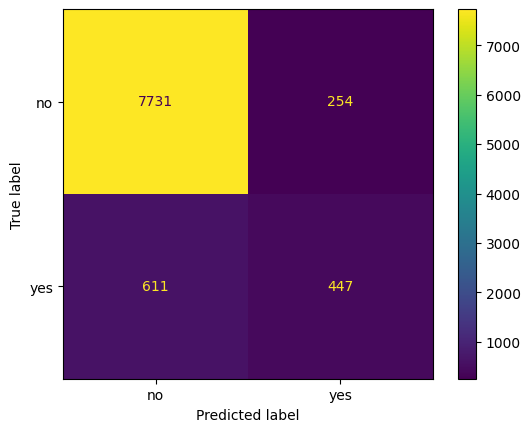

In [62]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(test_df["y"].to_numpy(),rf_predictions)
print(cm)

rf_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["no","yes"])
rf_display.plot()
plt.show()

In [64]:
TP,TN,FP,FN=cm[-1][-1],cm[0][0],cm[0][-1],cm[-1][0]
print(TP,TN,FP,FN)

accuracy=(TP+TN)/(cm.sum())
precision=TP/(TP+FP)
recall=TP/(TP+FN)
f_score=(2*precision*recall)/(precision+recall)

accuracy,precision,recall,f_score

447 7731 254 611


(0.9043459029083268, 0.637660485021398, 0.4224952741020794, 0.5082433200682206)